In [56]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [57]:
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\13) diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [60]:
# Data Visualization
# Histogram

In [61]:
import matplotlib.pyplot as plt

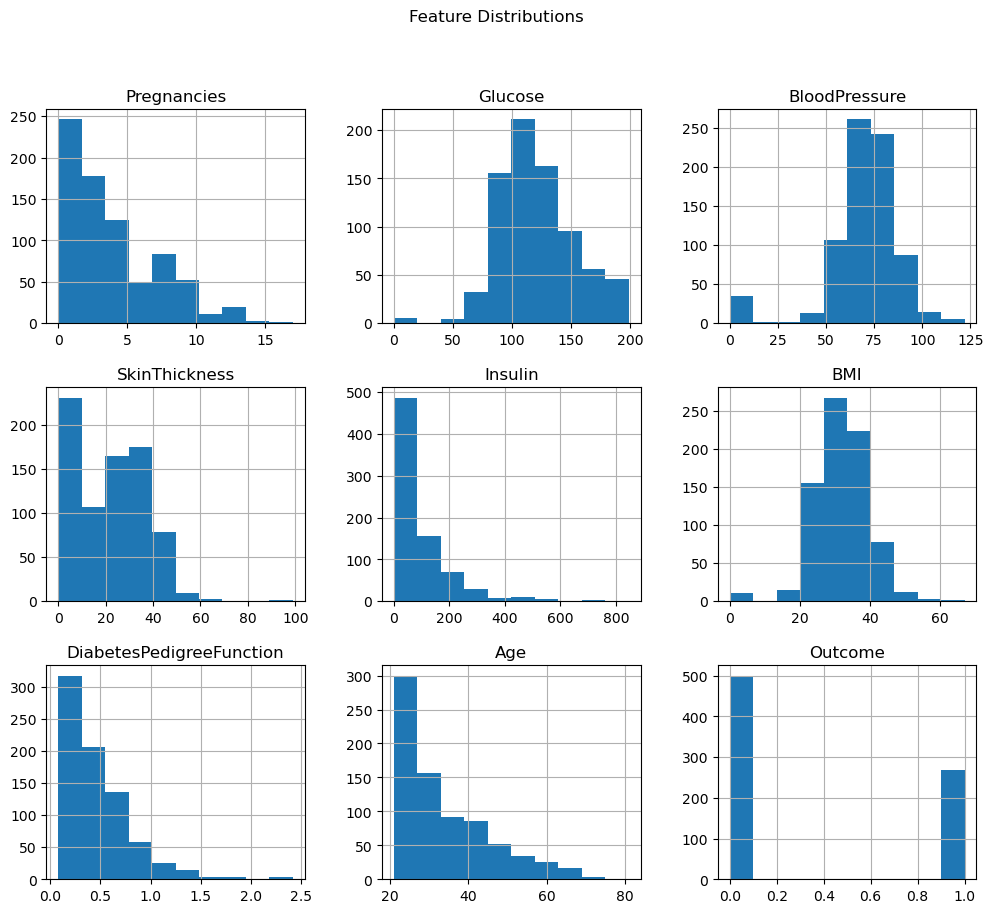

In [62]:
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

In [63]:
# Boxplot (outlier detection)

In [64]:
import seaborn as sns

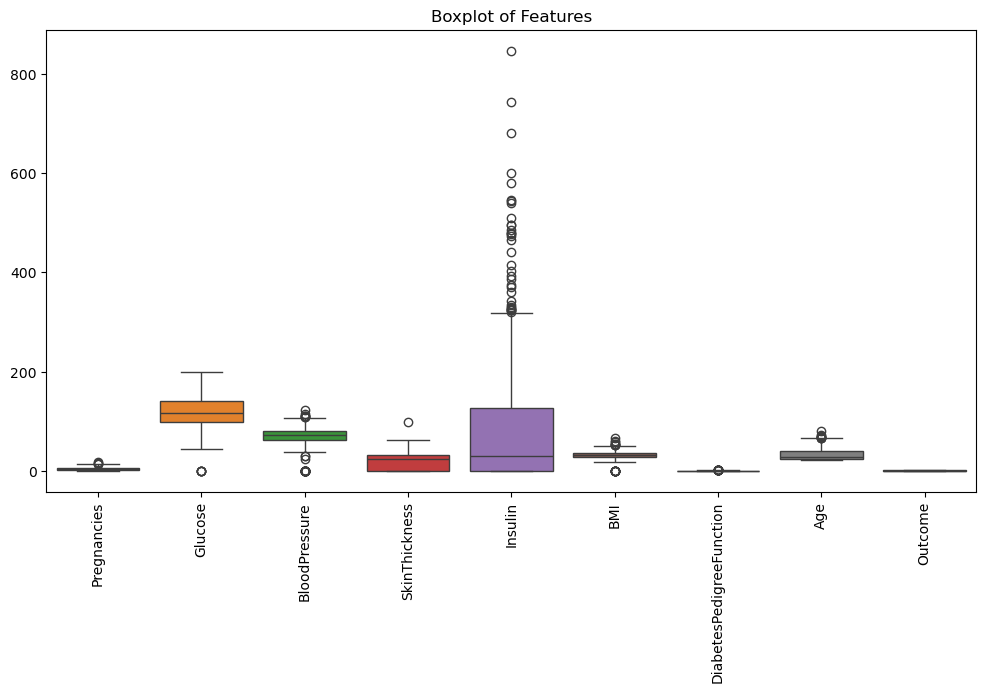

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

In [66]:
# Target variable distribution

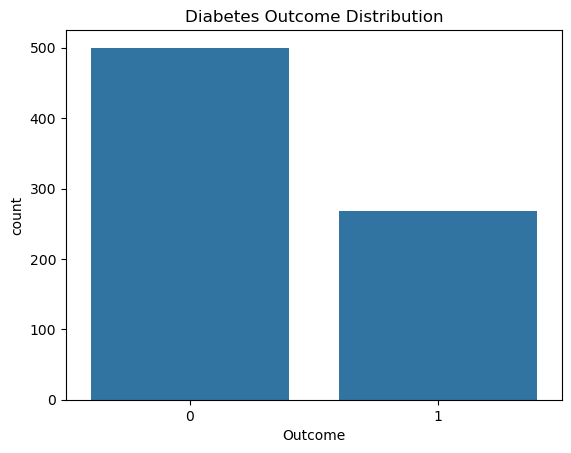

In [67]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

In [68]:
# Data Preprocessing
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [69]:
# Train-test split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[-0.85135507 -0.98013068 -0.40478372 ... -0.60767846  0.31079384
  -0.79216928]
 [ 0.35657564  0.16144422  0.46536842 ... -0.30213902 -0.11643851
   0.56103382]
 [-0.5493724  -0.50447447 -0.62232176 ...  0.3725939  -0.76486207
  -0.70759409]
 ...
 [-0.85135507 -0.75815778  0.03029235 ...  0.77997981 -0.78607218
  -0.28471812]
 [ 1.86648903 -0.31421198  0.03029235 ... -0.56948603 -1.01938346
   0.56103382]
 [ 0.05459296  0.73223168 -0.62232176 ... -0.31486983 -0.57700104
   0.30730824]]
[[ 0.96054099  1.20788789 -0.29601471 ... -0.58221684 -0.55579092
   0.56103382]
 [ 1.86648903 -1.67775979  1.98813468 ...  0.44897876 -0.58306107
   1.15306018]
 [-0.5493724   0.03460257  0.3565994  ...  0.499902    0.01688223
  -0.6230189 ]
 ...
 [-0.5493724  -1.23381399 -0.94862882 ... -0.44217793  3.70138246
  -0.70759409]
 [ 0.05459296  2.00064824  0.46536842 ...  0.6399409  -0.64669142
  -0.20014293]
 [-0.85135507 -1.58262854  0.46536842 ...  0.15617013 -0.16794879
  -1.04589487]]


In [74]:

import lightgbm
import lightgbm
print(lightgbm.__version__)

4.6.0


In [75]:
# Model 1: LightGBM

In [76]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [77]:
# Train LightGBM model

In [78]:
lgbm = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    random_state=42
)

In [79]:
lgbm.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [80]:
# Evaluate LightGBM

In [81]:
y_pred_lgbm = lgbm.predict(X_test_scaled)

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [82]:
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

LightGBM Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [83]:
# Model 2: XGBoost

In [84]:
from xgboost import XGBClassifier

In [85]:
import xgboost
print(xgboost.__version__)

3.1.3


In [86]:

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [87]:
xgb.fit(X_train_scaled, y_train)

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [88]:
# Evaluate XGBoost

In [89]:
y_pred_xgb = xgb.predict(X_test_scaled)

In [90]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [91]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

In [92]:
lgbm_cv = cross_val_score(lgbm, X_train_scaled, y_train, cv=5)
xgb_cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)

[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 583
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 172, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 576
[LightGBM] [Info] Number of data points in the train set: 492, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:35:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [93]:
# LGBM Hyperparameter Tuning
lgbm = LGBMClassifier(random_state=42)

lgbm_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [-1, 5, 10],
    'num_leaves': [20, 31]
}

lgbm_grid = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

lgbm_grid.fit(X_train, y_train)

print("Best LGBM Parameters:", lgbm_grid.best_params_)
print("Best LGBM CV Accuracy:", lgbm_grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
Best LGBM Parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 20}
Best LGBM CV Accuracy: 0.7639077702252433


In [94]:
# Train Best LGBM Model
best_lgbm = lgbm_grid.best_estimator_

lgbm_pred = best_lgbm.predict(X_test)

from sklearn.metrics import accuracy_score

print("Tuned LGBM Test Accuracy:", accuracy_score(y_test, lgbm_pred))


Tuned LGBM Test Accuracy: 0.7467532467532467


In [95]:
# XGB Hyperparameter Tuning
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

print("Best XGB Parameters:", xgb_grid.best_params_)
print("Best XGB CV Accuracy:", xgb_grid.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best XGB Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best XGB CV Accuracy: 0.7704118352658936


C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:36:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [96]:
# Train Best XGB Model
best_xgb = xgb_grid.best_estimator_

xgb_pred = best_xgb.predict(X_test)

print("Tuned XGB Test Accuracy:", accuracy_score(y_test, xgb_pred))


Tuned XGB Test Accuracy: 0.7402597402597403


In [104]:
lgbm_default = LGBMClassifier(random_state=42)
lgbm_default.fit(X_train, y_train)
default_acc = accuracy_score(y_test, lgbm_default.predict(X_test)) * 100

print("Default LGBM Accuracy: {:.2f}%".format(default_acc))



[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

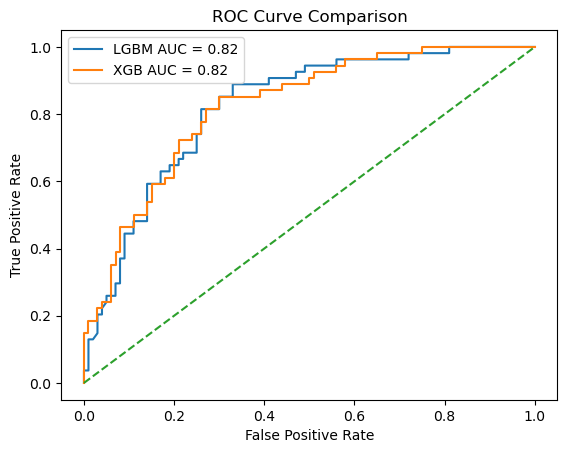

In [98]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lgbm_probs = best_lgbm.predict_proba(X_test)[:,1]
xgb_probs = best_xgb.predict_proba(X_test)[:,1]

lgbm_auc = roc_auc_score(y_test, lgbm_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, label="LGBM AUC = {:.2f}".format(lgbm_auc))
plt.plot(fpr_xgb, tpr_xgb, label="XGB AUC = {:.2f}".format(xgb_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


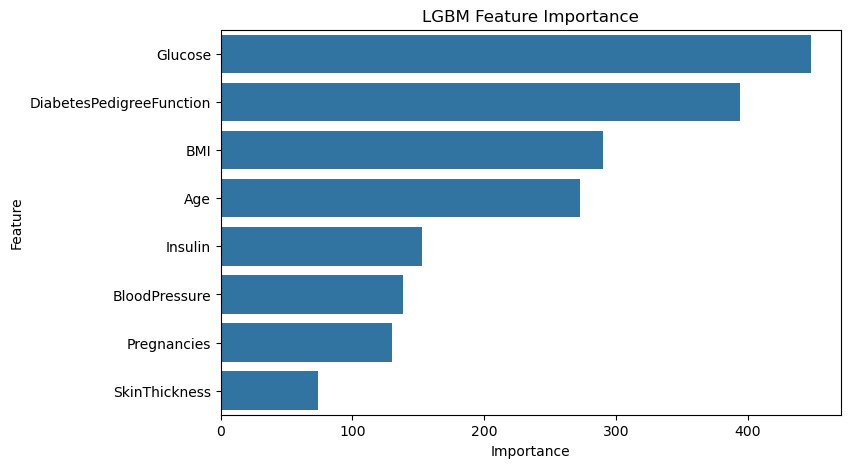

In [99]:
import seaborn as sns

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("LGBM Feature Importance")
plt.show()


In [100]:
print("LightGBM CV Accuracy:", lgbm_cv.mean())
print("XGBoost CV Accuracy:", xgb_cv.mean())

LightGBM CV Accuracy: 0.7459816073570572
XGBoost CV Accuracy: 0.7508863121418099


In [101]:

"""
| Metric      | LightGBM  | XGBoost         |
| ----------- | --------- | --------------- |
| Speed       | Faster    | Slightly slower |
| Accuracy    | High      | Very high       |
| Memory      | Efficient | More memory     |
| Overfitting | Less      | Needs tuning    |
"""

'\n| Metric      | LightGBM  | XGBoost         |\n| ----------- | --------- | --------------- |\n| Speed       | Faster    | Slightly slower |\n| Accuracy    | High      | Very high       |\n| Memory      | Efficient | More memory     |\n| Overfitting | Less      | Needs tuning    |\n'